In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [5]:
conn = sqlite3.connect('inventory.db')

df = pd.read_sql_query('select * from vendor_sales_summary', conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SaletoPurchaseRatio
0,1128,Jack Daniels No 7 Black,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,Tito's Handmade Vodka,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,Absolut 80 Proof,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,Capt Morgan Spiced Rum,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,Ketel One Vodka,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,257032.07,1199901.61,28.412764,0.983556,1.396897


In [6]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


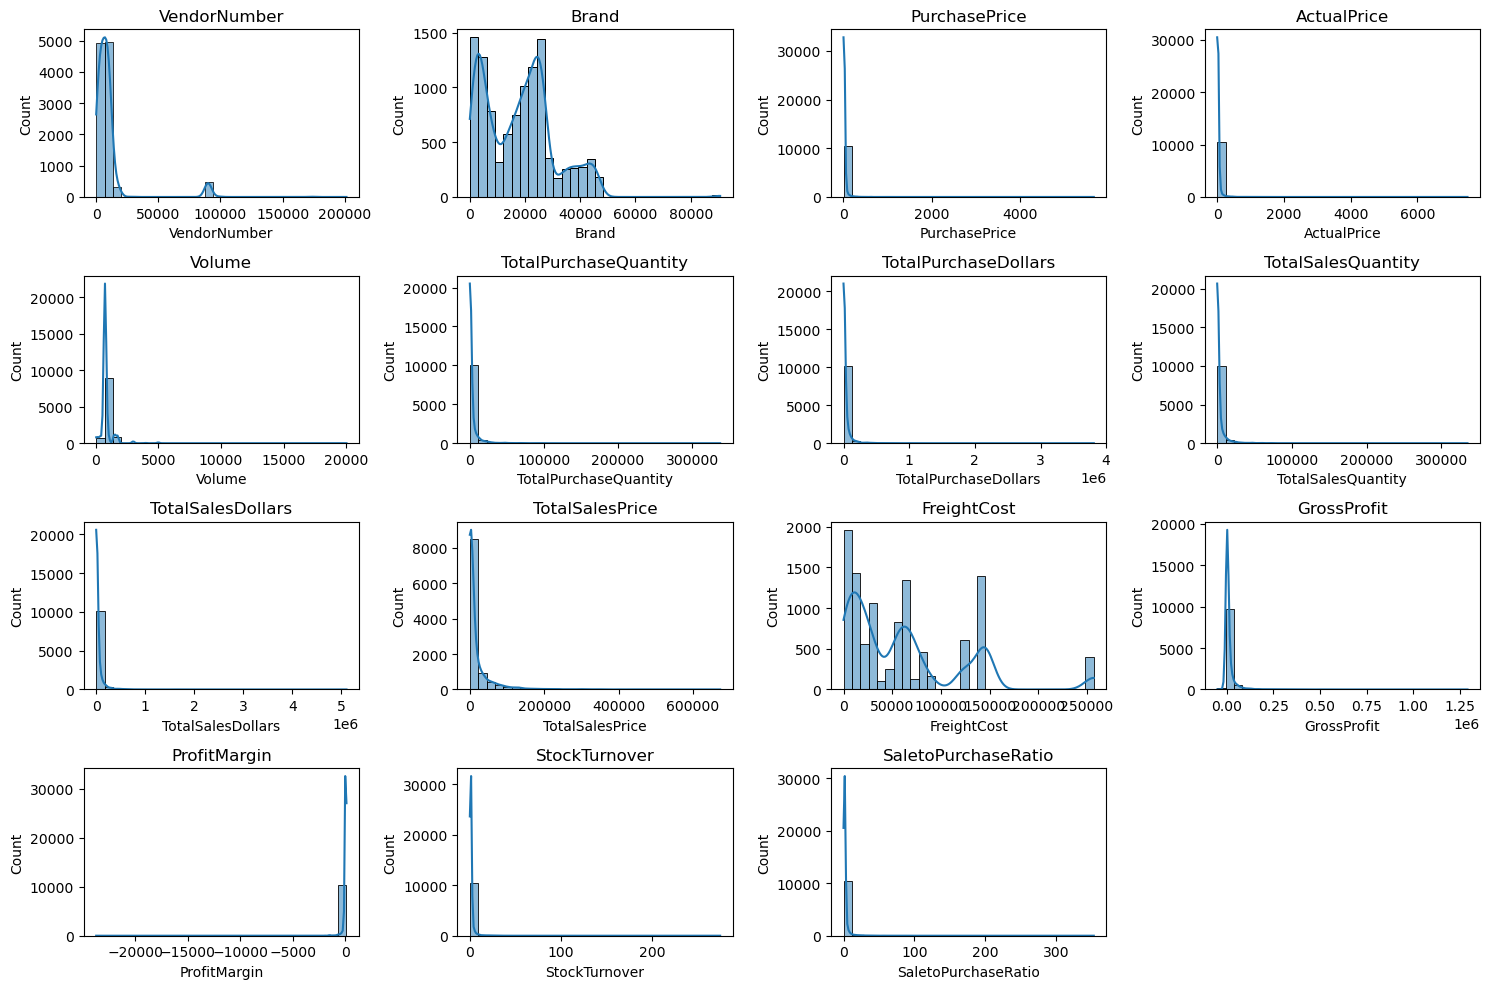

In [7]:
#numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.histplot(df[col], bins = 30, kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()

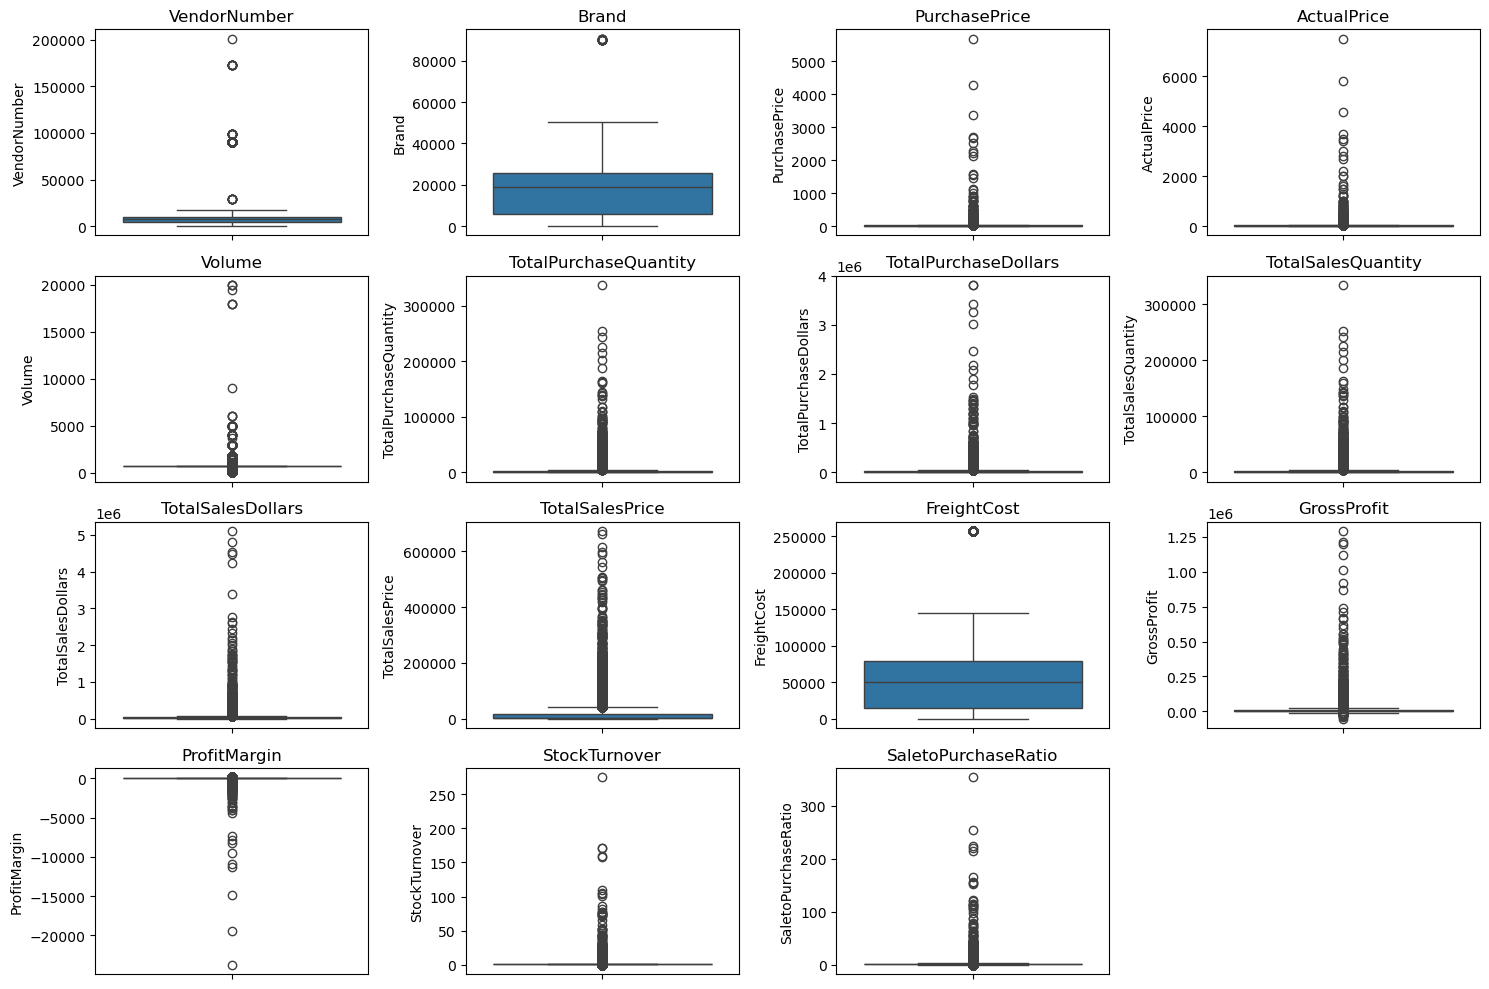

In [8]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [9]:
df = pd.read_sql_query("""SELECT * FROM vendor_sales_summary
where GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""", conn)

In [10]:
df.isnull().sum()

VendorNumber             0
VendorName               0
Brand                    0
Description              0
PurchasePrice            0
ActualPrice              0
Volume                   0
TotalPurchaseQuantity    0
TotalPurchaseDollars     0
TotalSalesQuantity       0
TotalSalesDollars        0
TotalSalesPrice          0
FreightCost              0
GrossProfit              0
ProfitMargin             0
StockTurnover            0
SaletoPurchaseRatio      0
dtype: int64

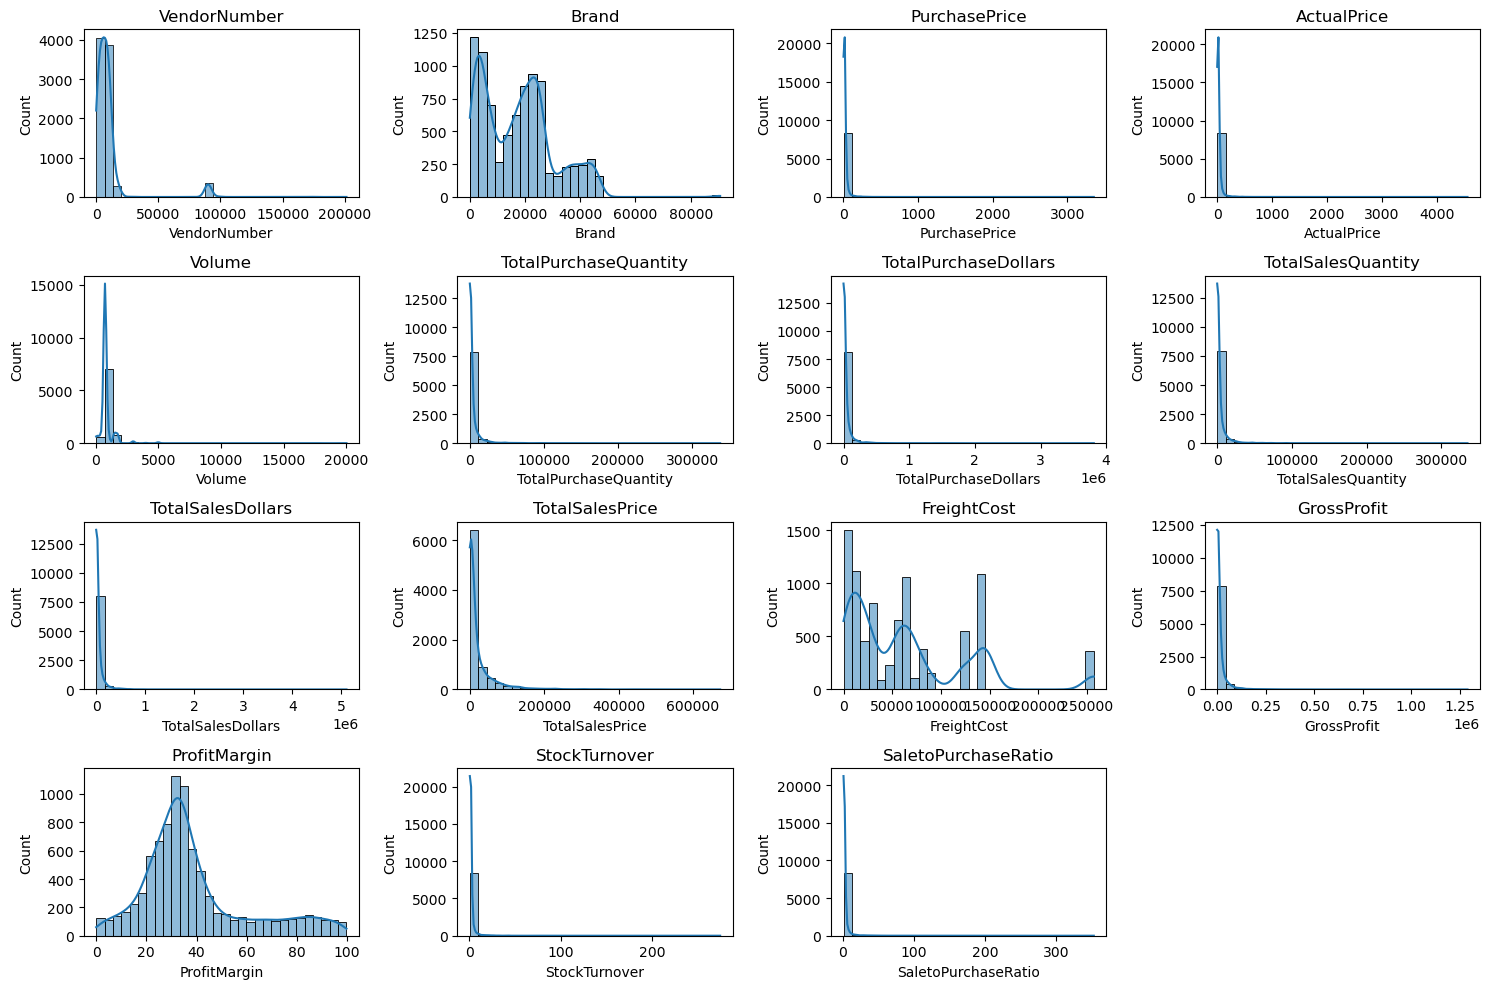

In [11]:
#numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.histplot(df[col], bins = 30, kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()

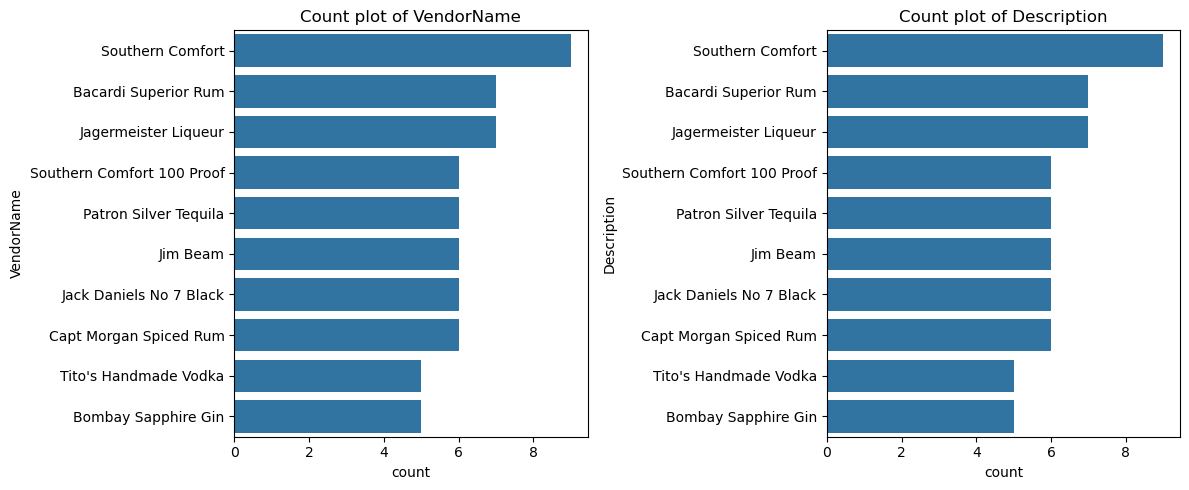

In [12]:
#distribution of categorical columns
categorical_cols = ['VendorName', 'Description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

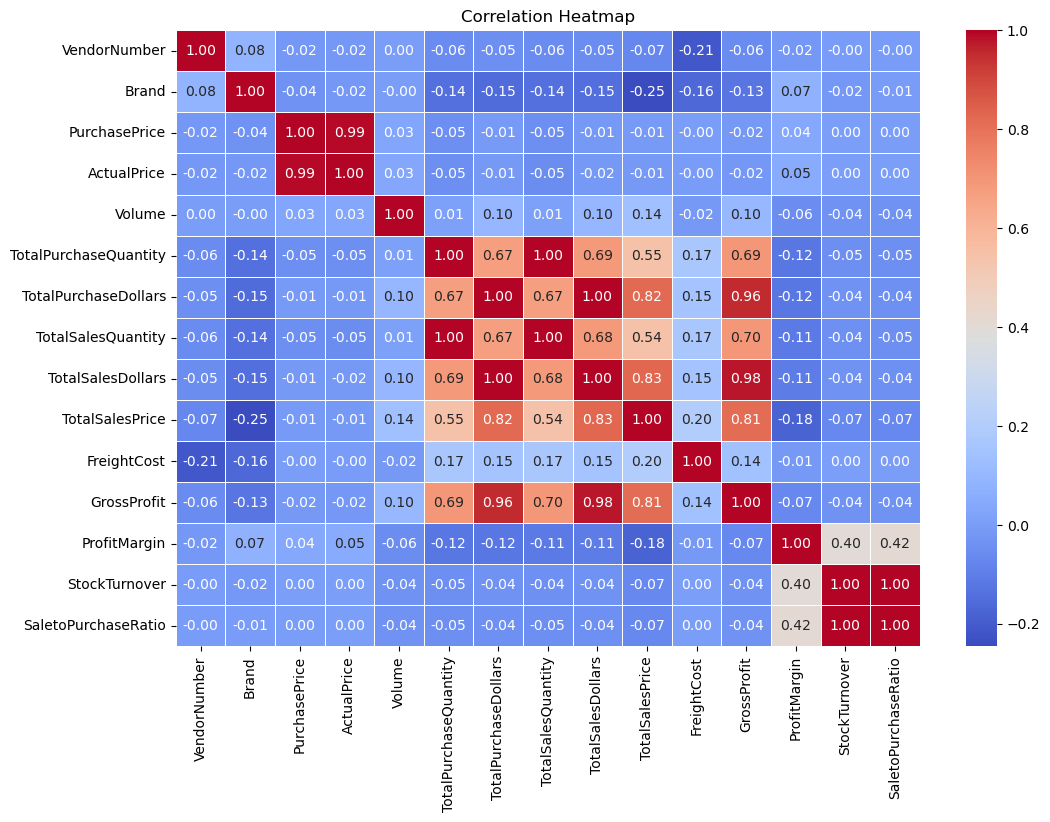

In [13]:
#correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#identify brands that needs promotional or pricing adjustments which ex
#data analysis

brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()


In [15]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [16]:
low_sales_threshold

560.299

In [17]:
high_margin_threshold 

64.97017552750113

In [18]:
#filtering brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars']  <=low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


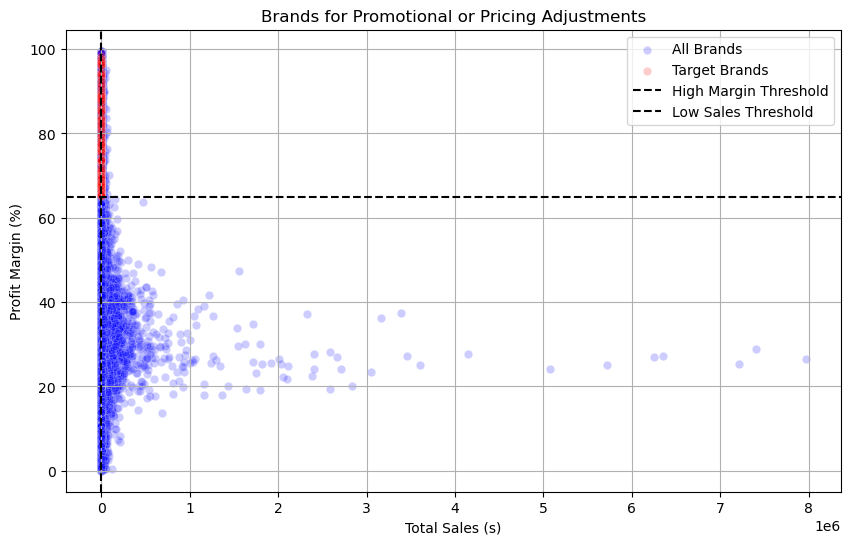

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance,x = 'TotalSalesDollars' , y = 'ProfitMargin', color='blue', label = 'All Brands', alpha = 0.2)
sns.scatterplot(data=target_brands,x = 'TotalSalesDollars' , y = 'ProfitMargin', color='red', label = 'Target Brands', alpha = 0.2)


plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')


plt.xlabel('Total Sales (s)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for Promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
#which vendors and brands demonstrate the highest sales performance?
#top vendors and brands by sales performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [21]:
top_vendors

VendorName
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [22]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [23]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value /1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/ 1_000:.2f}K"
    else:
        return str(value)

In [24]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

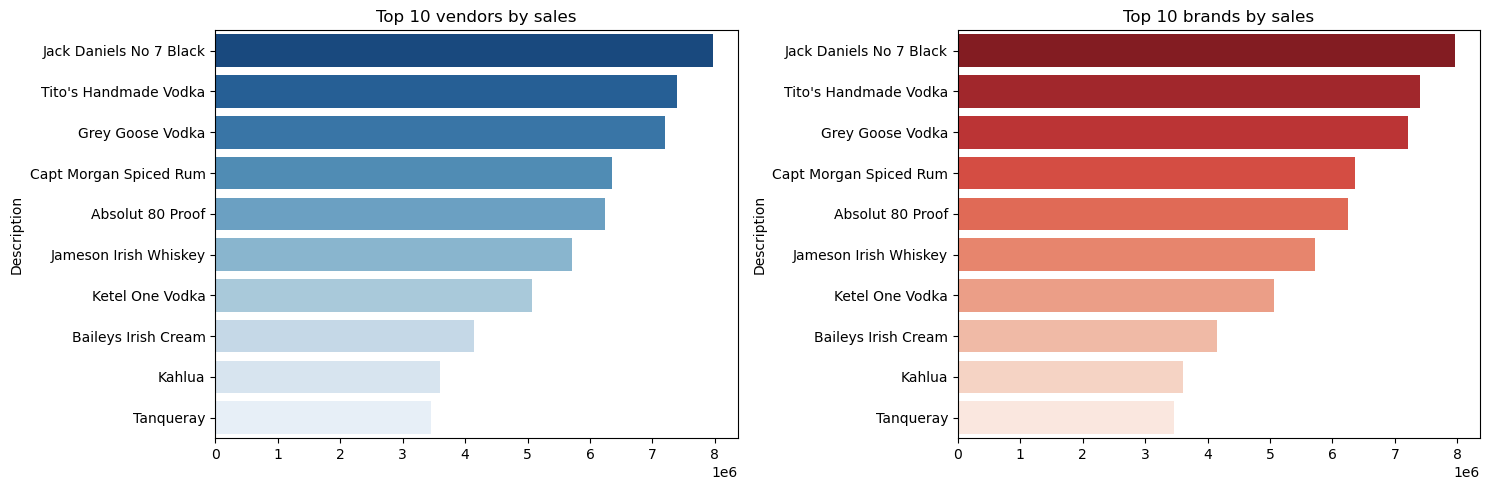

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.barplot(y = top_brands.index, x=top_brands.values, palette='Blues_r')
plt.title('Top 10 vendors by sales')


plt.subplot(1,2,2)
ax2 = sns.barplot(y = top_brands.index.astype(str), x=top_brands.values, palette='Reds_r')
plt.title('Top 10 brands by sales')

plt.tight_layout()
plt.show()

In [26]:
#which vendors contribute to total purchase dollars?
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [27]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum() *100

In [28]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [29]:
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors.sort_values('PurchaseContribution%', ascending=False)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
3771,Jack Daniels No 7 Black,5.82M,2.14M,7.96M,1.90
7114,Tito's Handmade Vodka,5.62M,1.78M,7.40M,1.83
3402,Grey Goose Vodka,5.26M,1.95M,7.21M,1.71
86,Absolut 80 Proof,4.65M,1.60M,6.24M,1.51
1272,Capt Morgan Spiced Rum,4.62M,1.73M,6.36M,1.50
3850,Jameson Irish Whiskey,4.31M,1.41M,5.72M,1.40
4101,Ketel One Vodka,3.67M,1.40M,5.07M,1.20
478,Baileys Irish Cream,2.93M,1.22M,4.15M,0.95
4019,Kahlua,2.72M,888.77K,3.60M,0.88
6846,Tanqueray,2.49M,970.42K,3.46M,0.81


In [30]:
top_vendors['Cumulative_Contributions'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contributions
3771,Jack Daniels No 7 Black,5.82M,2.14M,7.96M,1.90,1.90
7114,Tito's Handmade Vodka,5.62M,1.78M,7.40M,1.83,3.73
3402,Grey Goose Vodka,5.26M,1.95M,7.21M,1.71,5.44
86,Absolut 80 Proof,4.65M,1.60M,6.24M,1.51,6.95
1272,Capt Morgan Spiced Rum,4.62M,1.73M,6.36M,1.50,8.45
3850,Jameson Irish Whiskey,4.31M,1.41M,5.72M,1.40,9.85
4101,Ketel One Vodka,3.67M,1.40M,5.07M,1.20,11.05
478,Baileys Irish Cream,2.93M,1.22M,4.15M,0.95,12.00
4019,Kahlua,2.72M,888.77K,3.60M,0.88,12.88
6846,Tanqueray,2.49M,970.42K,3.46M,0.81,13.69


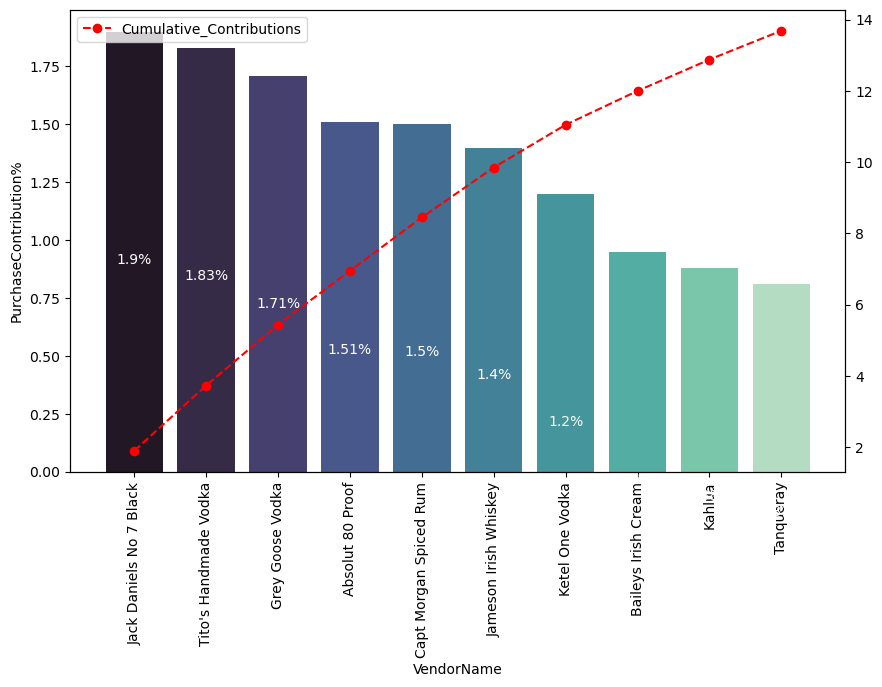

In [31]:
fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(x = top_vendors['VendorName'], y = top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)

for i , value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value-1, str(value) + '%', ha='center', fontsize=10, color='white')

ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contributions'], color='red', marker='o', linestyle='dashed', label='Cumulative_Contributions')
ax1.set_xticklabels(top_vendors['VendorName'], rotation= 90)

ax2.legend()
plt.show()

In [32]:
#how much total procurement is dependent on the top vendors?

round(top_vendors['PurchaseContribution%'].sum(),2)

13.69

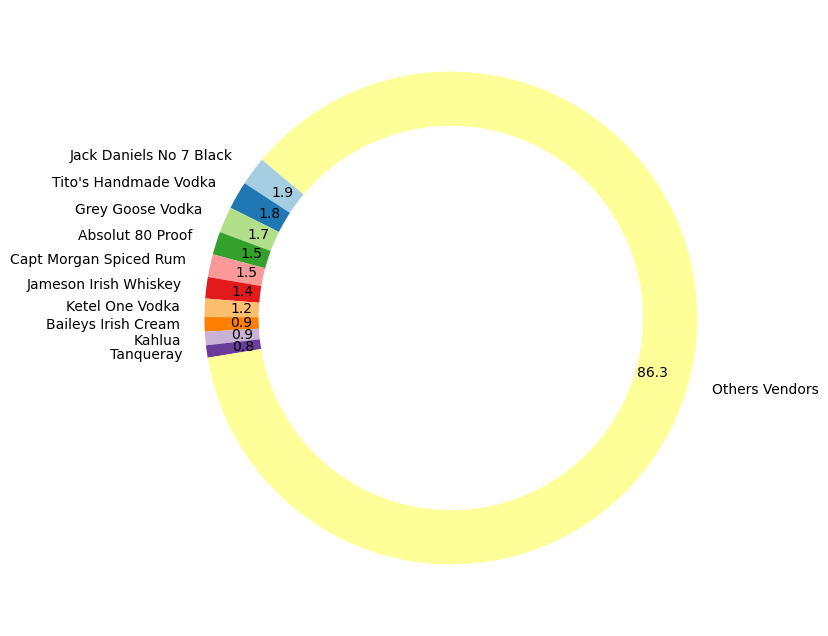

In [33]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

vendors.append('Others Vendors')
purchase_contributions.append(remaining_contribution)

fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f',
                                  startangle=140, pctdistance=0.85, colors = plt.cm.Paired.colors)
centre_circle = plt.Circle((0,0), 0.78, fc="white")
fig.gca().add_artist(centre_circle)

plt.show()

In [34]:
#does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost savings
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [35]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'])

In [36]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [37]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


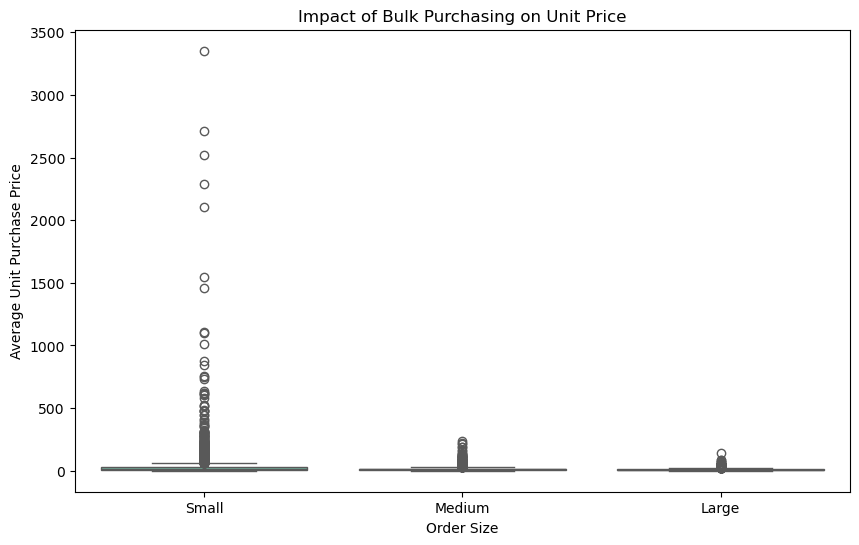

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x='OrderSize', y = 'UnitPurchasePrice', palette='Set2')
plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

In [39]:
#which vendors have low inventory turnover, indicating stock and slow moving products

df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
Mas Belles Eaux Les Cot Roug,0.428571
Viberti Chard,0.472222
Velvet Crush Cab Svgn,0.500000
Ca'Momi Chard Napa Vly,0.513354
Beringer Cab Svgn Pvt RSV Np,0.528205
Jewell Towne Cab Svgn NH,0.567568
Line 39 Merlot,0.567568
BV Coastal Estate Red,0.569444
Nicolas Potel Pnt Nr Bourgog,0.582857


In [40]:
#how much capital is locked in unsold inventory per vendor and which vendors contribute to it the most?

df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))



Total Unsold Capital: 2.71M


In [41]:
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by = 'UnsoldInventoryValue', ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
6508,Smirnoff Traveler,169.79K
3933,Johnnie Walker Black Label,140.17K
4611,Makers Mark,130.19K
3943,Johnnie Walker Red Label,129.10K
4143,Knob Creek Bourbon,96.71K
3771,Jack Daniels No 7 Black,93.96K
7114,Tito's Handmade Vodka,90.20K
3850,Jameson Irish Whiskey,89.78K
5413,Patron Silver Tequila,87.27K
4101,Ketel One Vodka,87.12K


In [42]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [43]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [44]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1+ confidence) / 2, df=len(data) -1)
    margin_of_error = t_critical * std_err
    return mean_val , mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61, Mean: 31.18)
Low Vendors 95% CI: (40.50, 42.64, Mean: 41.57)


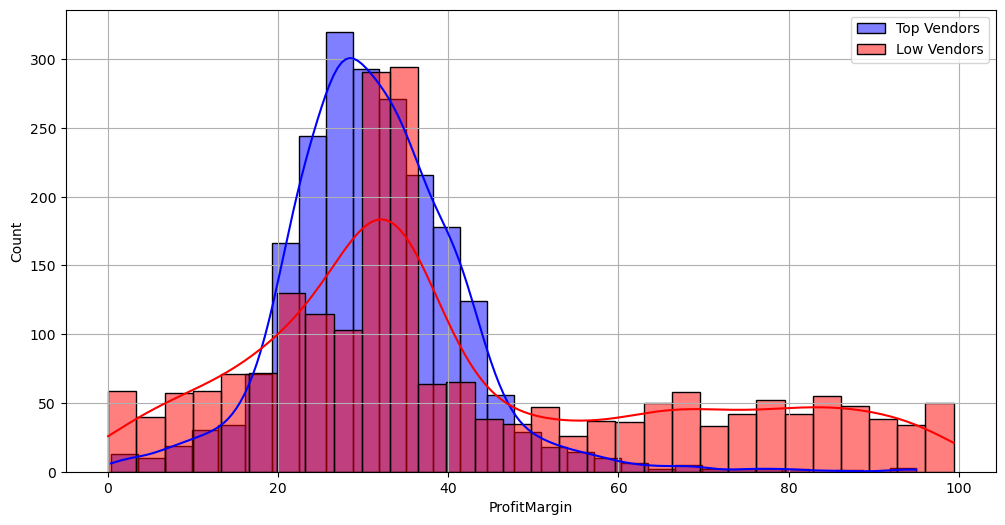

In [45]:
top_mean, top_lower , top_upper = confidence_interval(top_vendors)
low_mean , low_lower, low_upper = confidence_interval(low_vendors)

print(f'Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}, Mean: {top_mean:.2f})')
print(f'Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}, Mean: {low_mean:.2f})')

plt.figure(figsize=(12,6))

sns.histplot(top_vendors, kde=True, color='blue', bins=30, alpha = 0.5, label='Top Vendors')

sns.histplot(low_vendors, kde=True, color='red', bins=30, alpha=0.5, label='Low Vendors')

plt.legend()
plt.grid(True)
plt.show()


